In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() #각 항목의 null 값의 개수 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

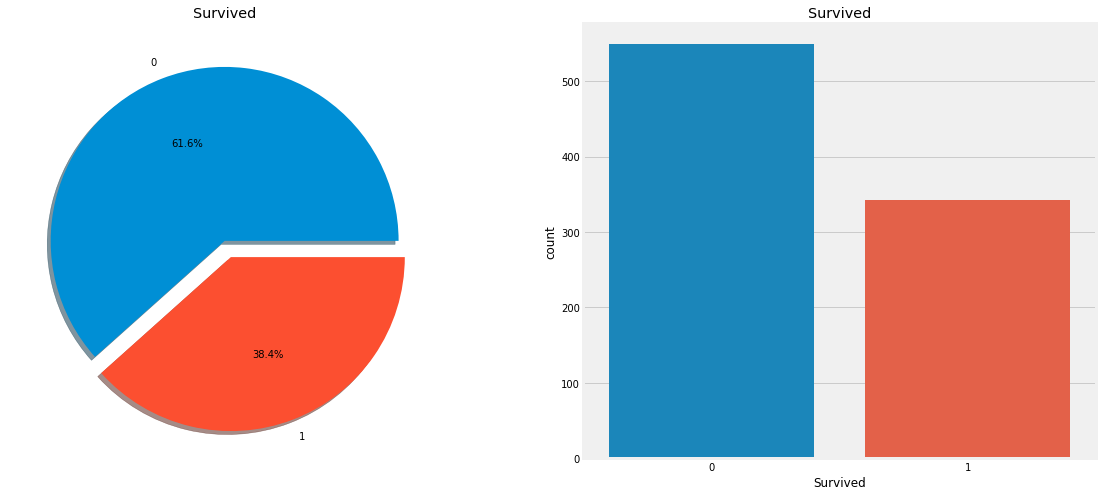

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8)) #f : figure로써 - 전체 subplot ; ax : axe로써 - 전체 중 낱낱개

data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%", ax = ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

전체 중 38.4%의 사람만 살아남은 것을 확인할 수 있다.

## Sex : categorical feature

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

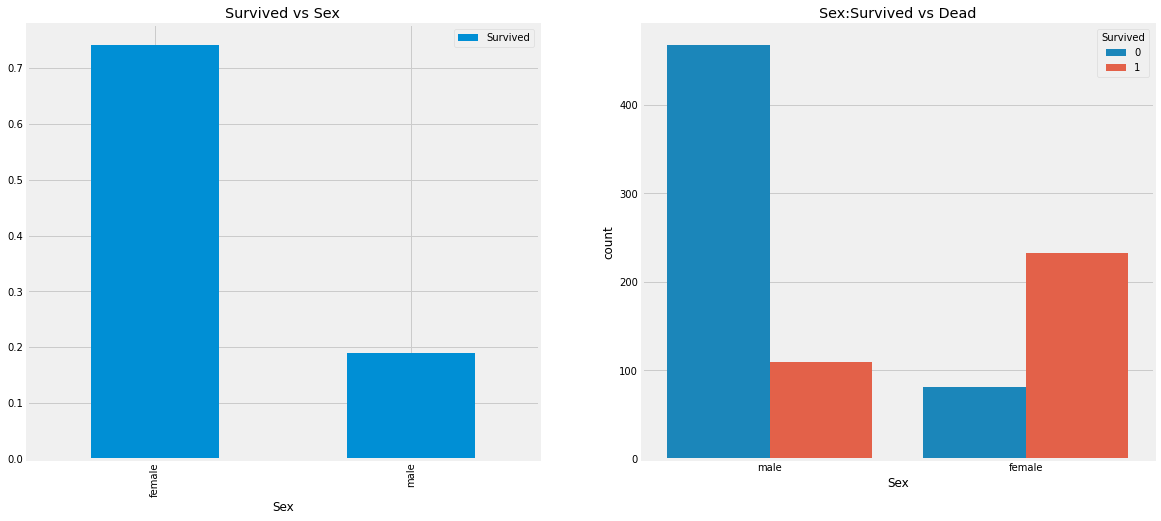

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

여성은 거의 75%가 살아남은 반면, 남자는 18~19%정도 살아남은 것을 볼 수 있다.

## Pclass : Ordinal Feature

In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
# Pclass를 기준으로 Survived의 빈도를 구한다

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


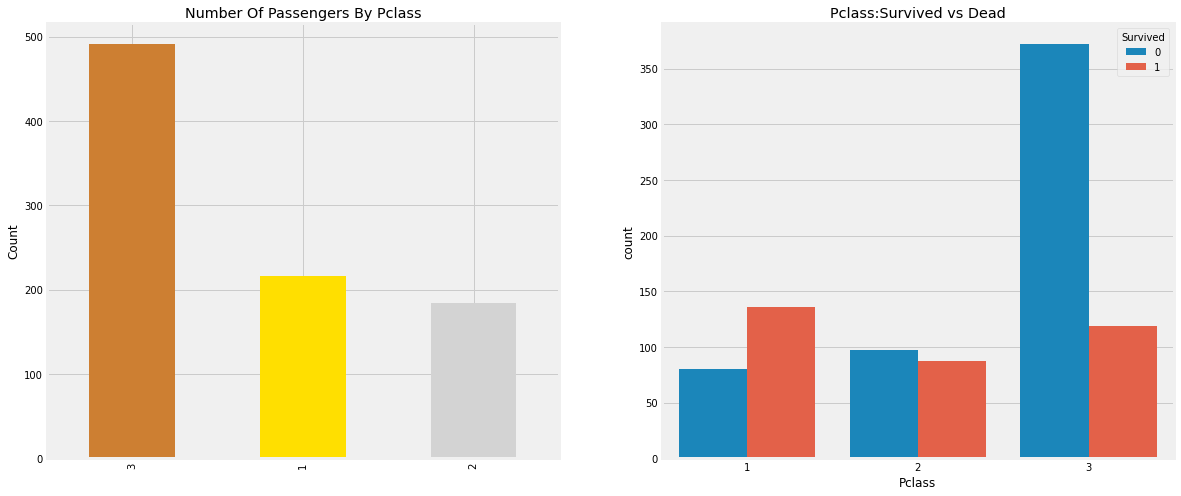

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Pclass 3인 사람이 1인 사람보다 많았고, 살아남은 사람의 비율은 Pclass 3보다 1이 많았다.
따라서 높은 등급의 클래스, 즉 부유층일 수록 많은 사람이 살아남은 것을 볼 수 있다.

### 성별과 Survived 를 Pclass의 빈도를 확인

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

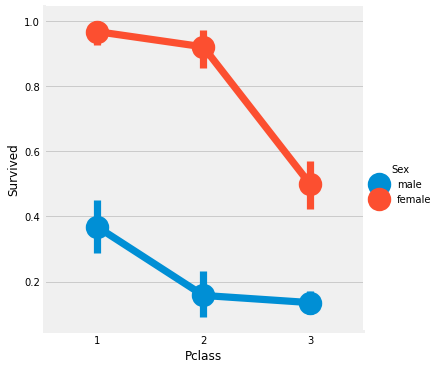

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data) #hue="구분값"
plt.show()

따라서 class 여부와 상관없이 여성이 남성보다 많이 살아남았다는 것을 확인할 수 있다.   
또한 1등급이 3등급보다 훨씬 많은 비율의 여성이 살았다는 것을 확인했다.

## Age : Continuous Feature

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


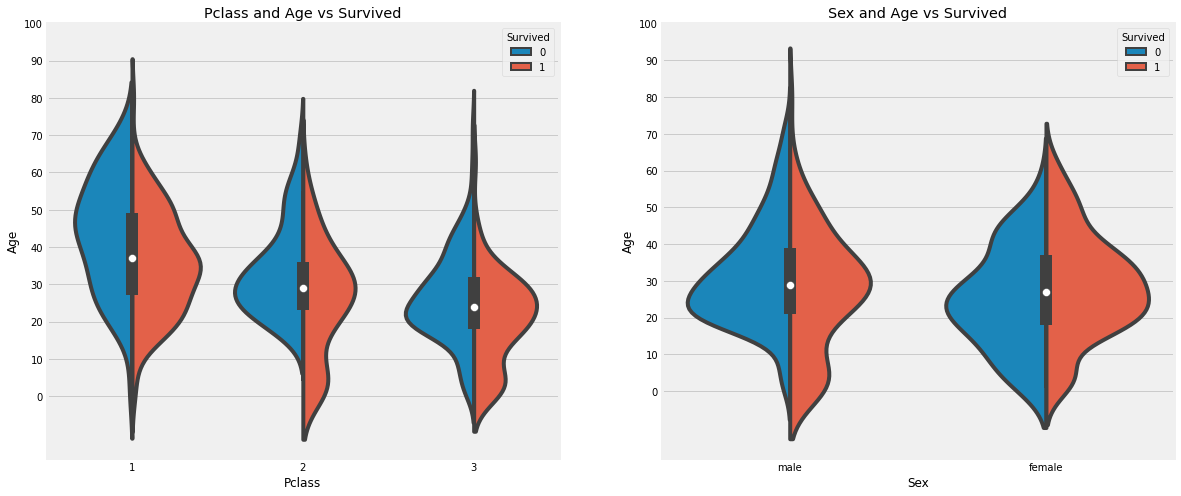

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

왼쪽은 Pclass와 Age 기준으로 살아남거나 그렇지 못한 사람들을 보여주고 있고, 오른쪽은 성별과 나이를 기준으로 보여주고 있다.

표를 보니 20-50대의 사람들이 많이 살아남은 것을 확인할 수 있었다.

### Name

In [14]:
data['Initial']=0

In [15]:
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

이름에 있는 Mr, Mrs, Miss등의 호칭을 따로 저장했다.

In [16]:
data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [17]:
data['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Jonkheer      1
Sir           1
Don           1
Capt          1
Ms            1
Countess      1
Mme           1
Name: Initial, dtype: int64

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

다양한 데이터들을 Mr, Miss, Mrs, Other로 바꿔준다.

In [19]:
data['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [20]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [21]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

처음 null값을 확인할 때 age에 많은 양의 null값이 있었다.
따라서 그 null값들을 채워주기 위해 각 호칭의 평균값을 내고, age가 null인 사람들에게 각자 호칭에 맞는 평균 나이를 채워주었다.

In [22]:
data['Age'].isnull().sum()

0

모든 사람의 Age가 null값을 갖지 않고 채워져있는 것을 확인할 수 있다.

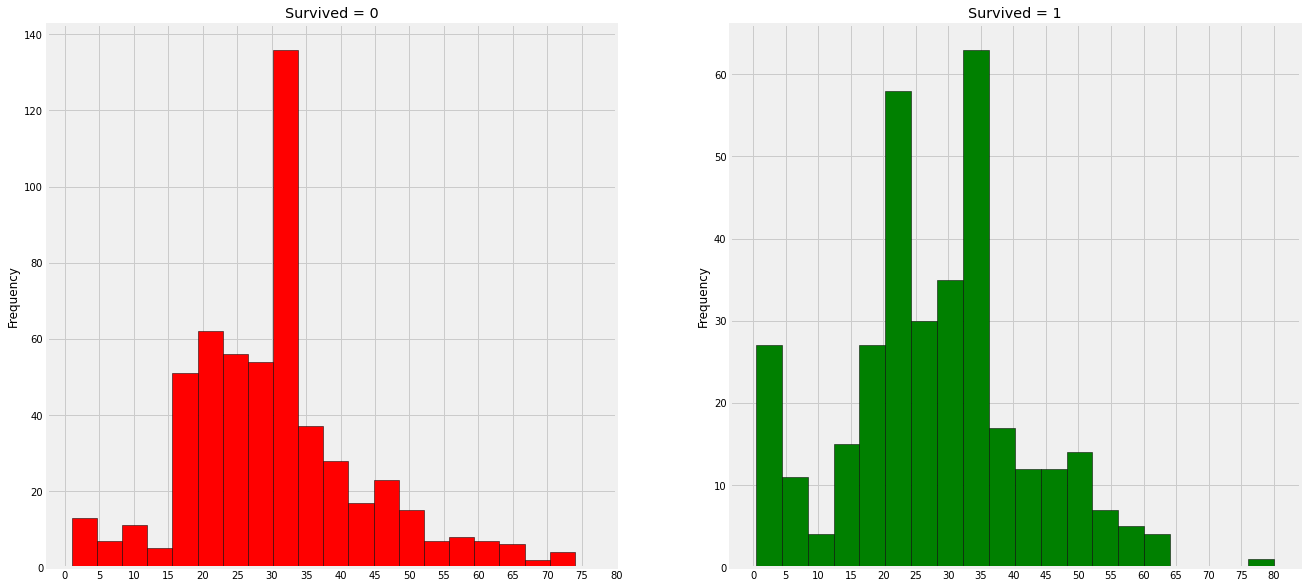

In [23]:
f,ax = plt.subplots(1,2, figsize=(20,10))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
ax[0].set_xticks(range(0,85,5))

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color = 'green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(range(0,85,5))

plt.show()

살아남은 사람들과 살아남지 못한 사람들을 각각 Age별로 히스토그램을 나타낸 것이다.

## Embarked : Categorical Value

In [24]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

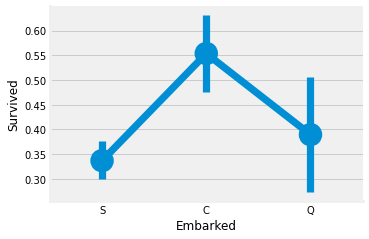

In [25]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

factor plot을 이용해 Embarked 별 Survived를 나타낸 것이다.
Port C에 있는 사람들이 가장 많이 살아남은 것을 활인할 수 있다.

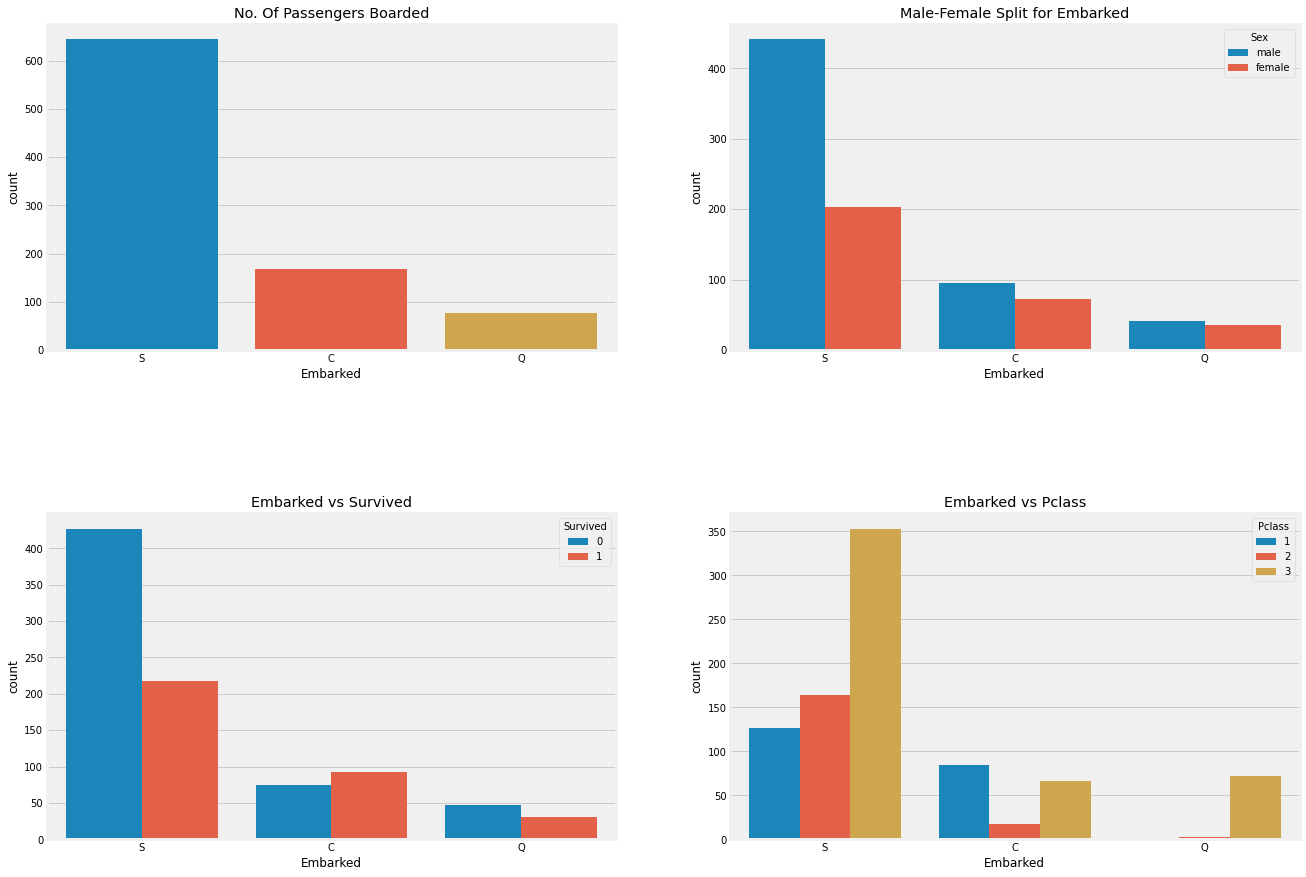

In [26]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Embarked별 탑승 승객, 남·여, 살아남은 사람, Pclass의 수를 나타내었다.
S에서 많은 사람이 탑승한 만큼 사망자와 생존자가 많이 나왔다.

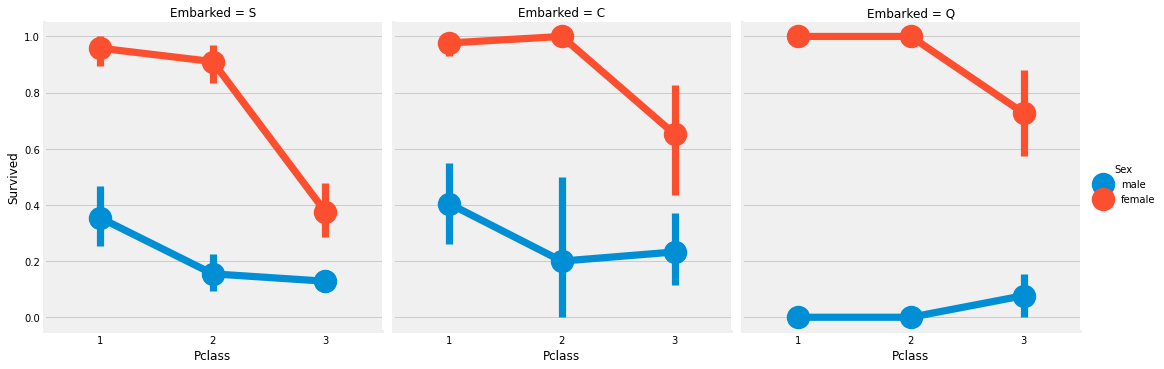

In [27]:
sns.factorplot('Pclass','Survived',hue = 'Sex',col='Embarked', data=data)
plt.show()

In [28]:
data['Embarked'].fillna('S',inplace=True)

In [29]:
data.Embarked.isnull().any()

False

데이터에서 Embarked에 몇몇 null 데이터가 있었는데, 대부분의 승객이 S에서 탑승했으므로 S로 채워준다.

## SibSip : Discrete Feature

In [30]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


형제, 자매, 배우자 수 총합을 기준으로 Surived를 구해보았다.

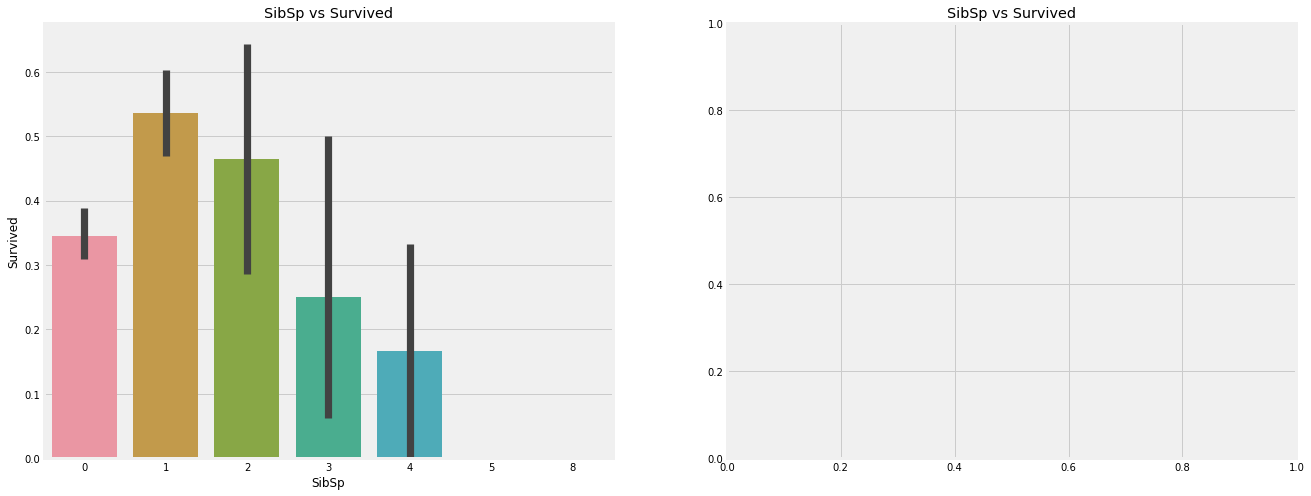

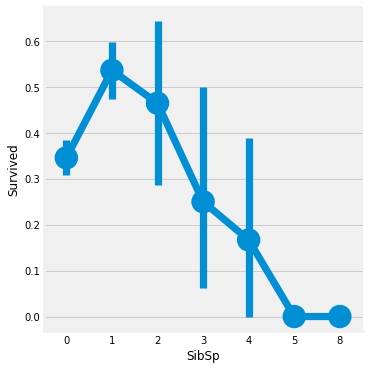

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
# plt.close(2)
plt.show()

In [32]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


그래프를 확인하니 같이 탄 사람이 1,2명일 때 생존 확률이 가장 높은 것을 확인할 수 있었다.

## Parch

In [33]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


부모, 자녀 수와 Pclass를 기준으로 나타낸 표이다.   
혼자 온 사람이 가장 많다.

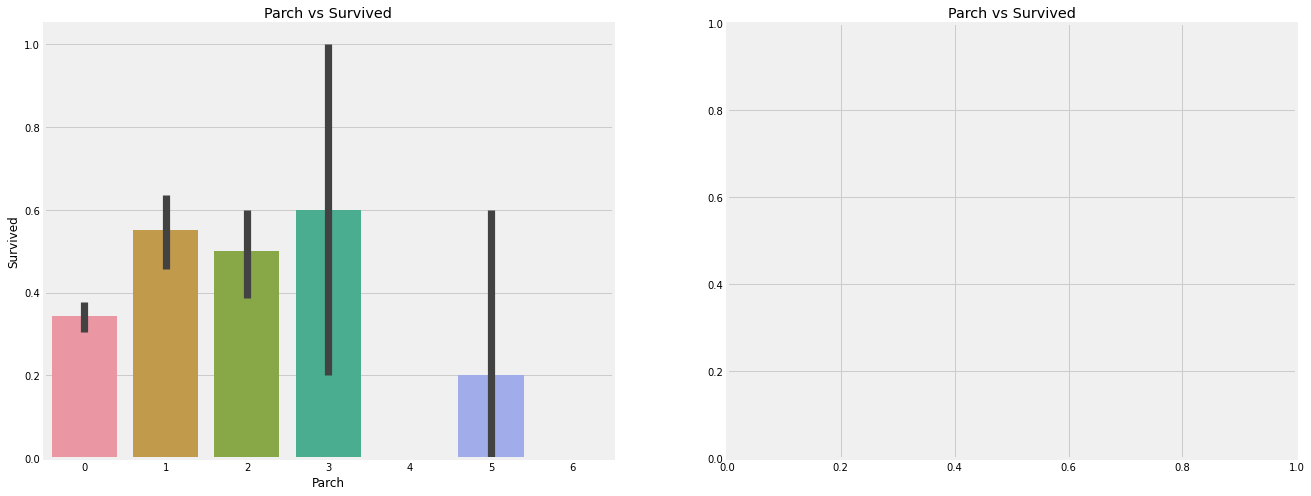

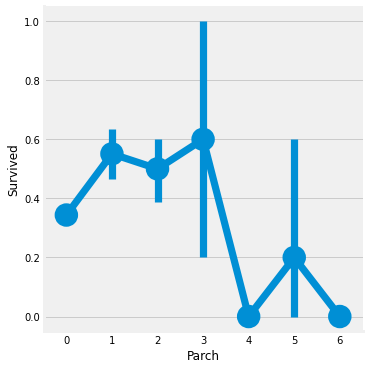

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
# plt.close(2)
plt.show()

혼자 온 것 보다 가족(1~3)명일 때가 더욱 생존 확률이 높은 것을 확인할 수 있다.

## Fare : continuous Feature

In [35]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


평균 가격표는 32인데 비싼건 512, 제일 싼 건 0이다.
데이터가 이상한 값이 있는 것 같다.

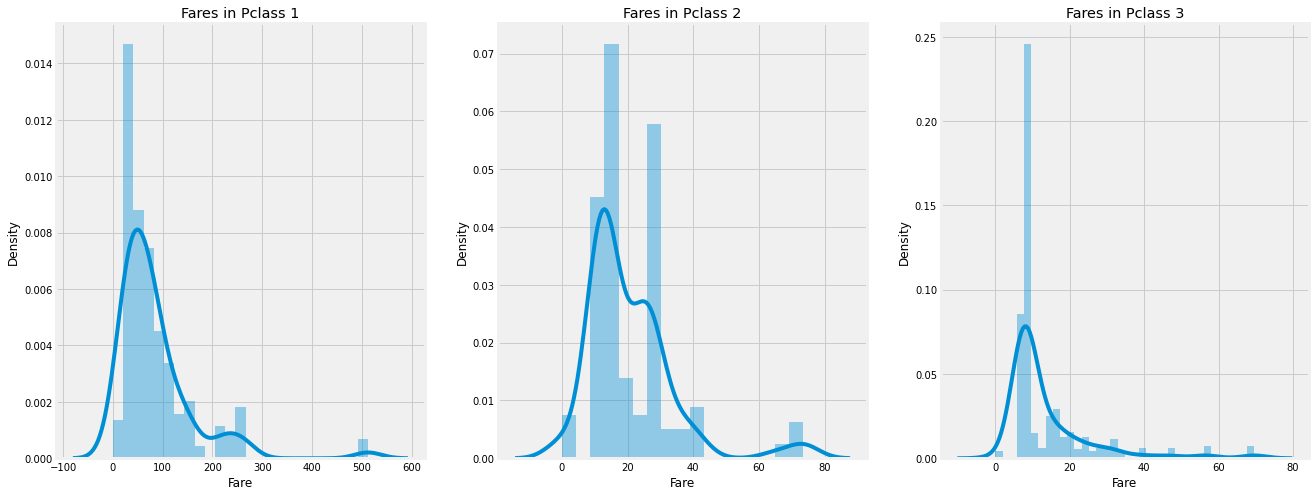

In [36]:
f, ax = plt.subplots(1,3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

각 클래스마다의 가격 분포를 확인할 수 있다.   
Pclass 1이 월등히 높은 가격을 지불하고 탔음을 확인할 수 있다.

## Correlation Between The Features¶

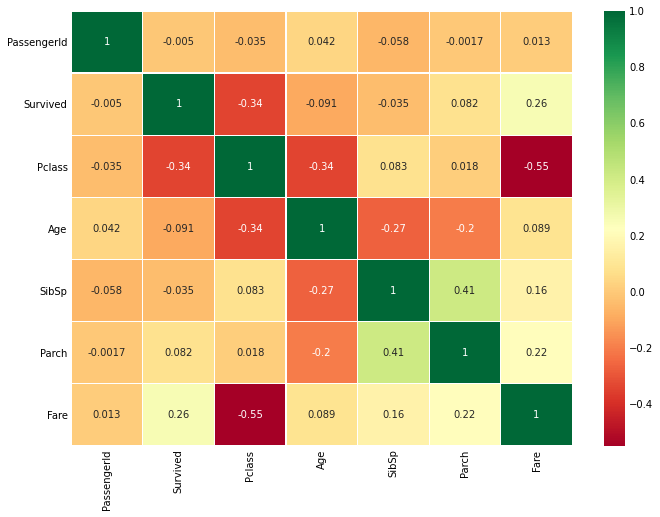

In [37]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

각 특성마다 연관이 얼마나 있는지 척도를 보는 것이다.
1에 가까울수록 양의 연관, -1에 가까울수록 음의 연관이 있다.

Parch와 SibSp가 연관이 비교적 가장 높은 것을 확인할 수 있었다.

## Age_band

위에서 Age는 continuous feature로 나타나져 있었다.
하지만 머신러닝 모델을 분석할 때, 나이는 categorical values로 바꿔야 한다.

In [38]:
data['Age'].max()

80.0

승객의 최대 나이는 80살이다.
따라서 0~80까지 총 5개의 레벨로 쪼개서 데이터를 저장해 보기로 했다.

In [39]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [40]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


나이가 어린 승객이 훨씬 많은 것을확인할 수 있었다.

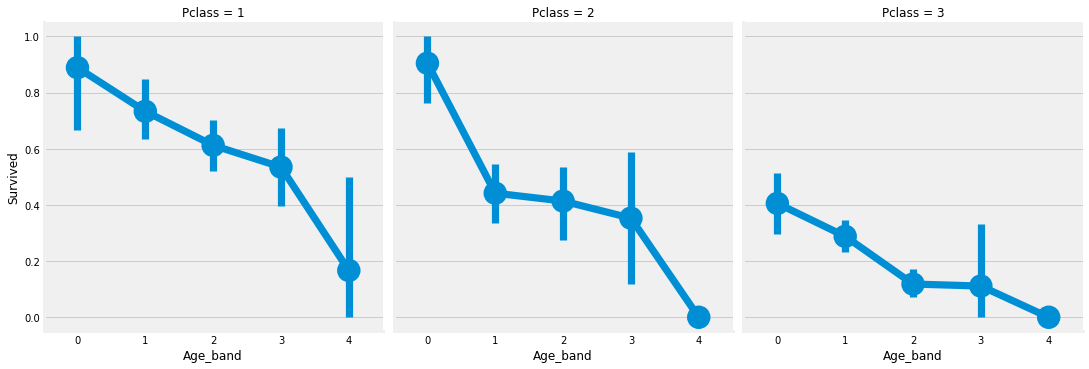

In [41]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

살아남은 숫자 또한 나이가 어린 사람의 비율이 높았다.

## Family_Size and Alone

Parch와 SibSp를 이용해 혼자인지, Family인지, 몇 명의 일행인지 나타내려고 한다.

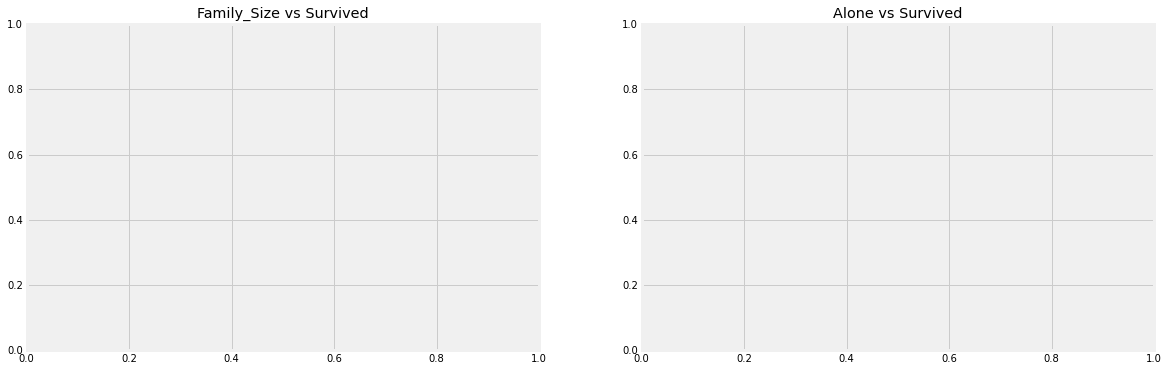

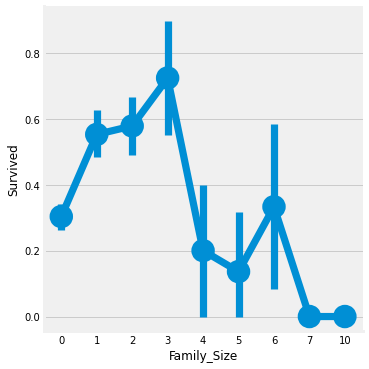

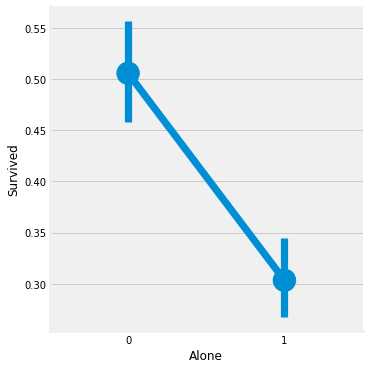

In [42]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
# plt.close(2)
# plt.close(3)
plt.show()

확실히 가족이 없는 사람보다 있는 사람의 생존 비율이 훨씬 높았고, 인원이 2~3명일 때 살아남을 확률이 가장 높은 것을 파악할 수 있었다.

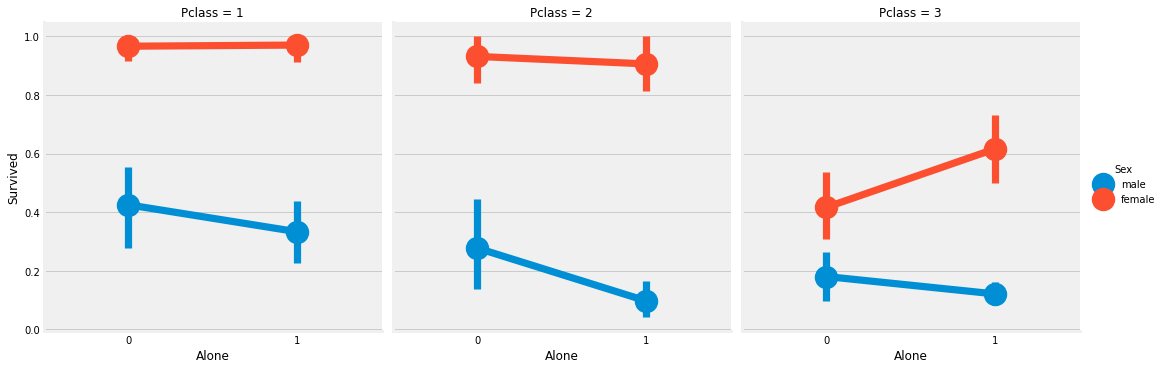

In [43]:
sns.factorplot('Alone','Survived',data=data, hue ="Sex", col = 'Pclass')
plt.show()

혼자인 사람 각 class, 성별 당 살아남은 사람의 비율이다.

## Fare_Range

`pd.qcut(x, q)`

x : 이산화를 수행할 배열을 입력받는다.   
q : int 혹은 float의 list-like 자료형을 입력받는다.   
   - int가 입력될 경우, 10분위 수라면 10이, 4분위 수라면 4를 입력받는다.   
   - float 배열을 입력받아 사용자 설정의 분위 수를 입력한다 ex) [0, 0.25, 0.5, 0.75, 1.0]

In [44]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


fare_range 가 증가할 수록 Survived할 확률이 증가함을 확인할 수 있다.   
즉 비싼 값을 내고 탔을 수록 살아남았을 확률이 높다는 것이다

In [45]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

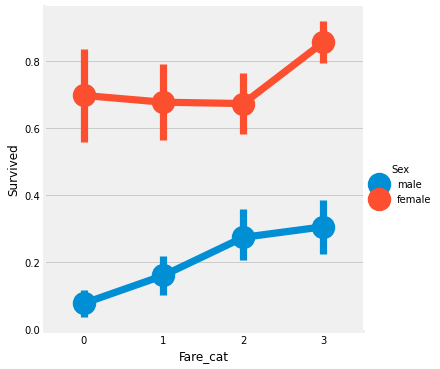

In [46]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

## Converting String Values into Numeric

In [48]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

Machine Learning Model에서는 String 데이터를 사용할 수 없기 때문에   
String으로 저장되어있던 Data (Sex, Embarked, Initial)을 숫자 데이터로 바꿔주었다.   

## Dropping UnNeeded Features

**Name**--> We don't need name feature as it cannot be converted into any categorical value.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> We have the Fare_cat feature, so unneeded

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range**--> We have the fare_cat feature.

**PassengerId**--> Cannot be categorised.

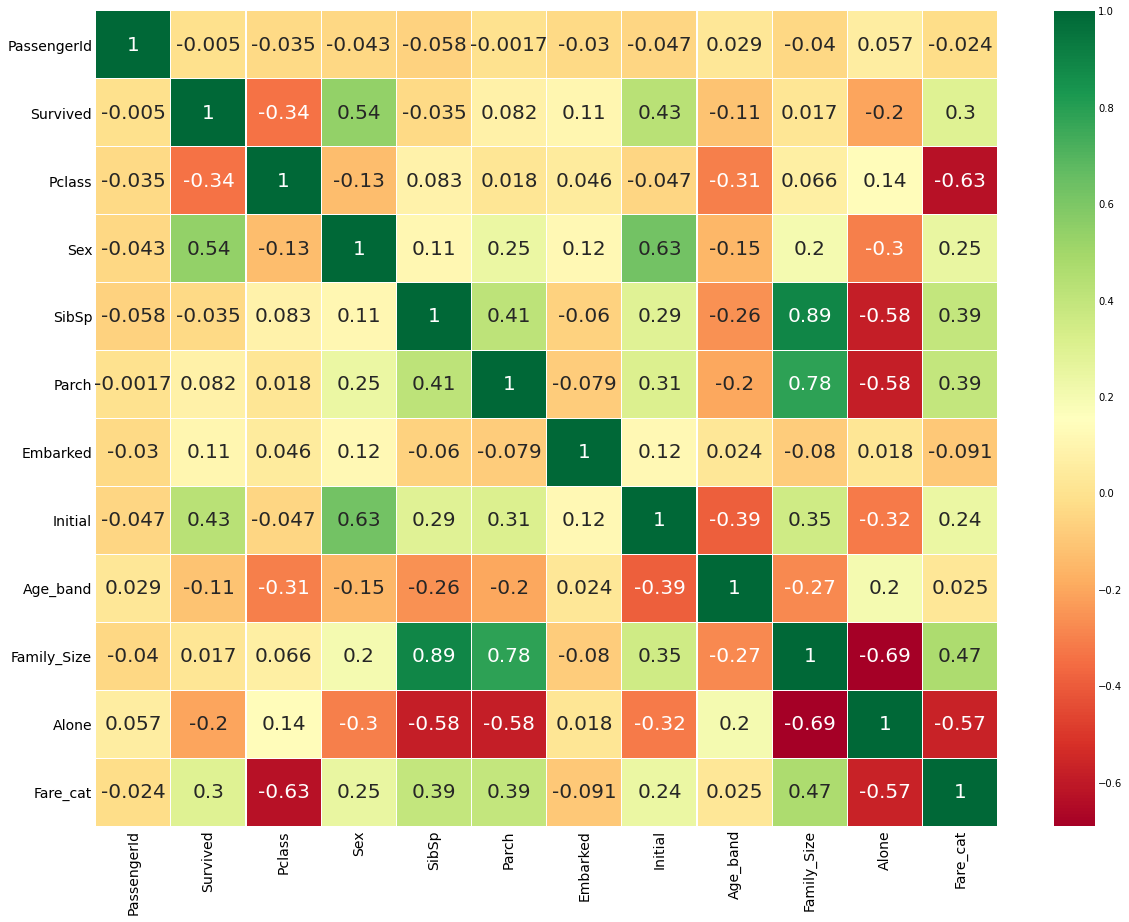

In [113]:

data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

각 Data의 상관관계를 살펴보니 SibSp와 Family_Size , Parch와 Family_Size가 높은 관계를 갖고 있는 것을 확인할 수 있다. ~당연한거지만~   
또한 Alone과 Family_Size가 음의 상관관계를 갖고 있는 것을 확인할 수 있었다. ~이것도 당연한거..~

# Predictive Modeling

In [114]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [59]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## Radial Support Vector Machines(rbf-SVM)

In [60]:
# data_passenger.columns
type(data)

pandas.core.frame.DataFrame

In [63]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

print()

# submission = pd.DataFrame({
#         "PassengerId": data_passenger["PassengerId"],
#         "Survived": prediction1
#     })

Accuracy for rbf SVM is  0.835820895522388
268


## Linear Support Vector Machine(linear-SVM)

In [125]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


## Logistic Regression

In [131]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


## Decision Tree

In [132]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


## K-Nearest Neighbours(KNN)

In [133]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


KNN model의 n_neighbours의 default value는 5이다.
따라서 이 n_neighbours의 개수에 따른 정확도를 나타내보자.

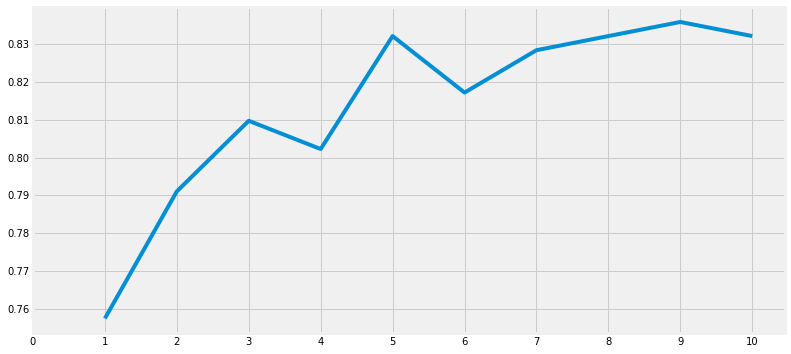

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [134]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

In [135]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## Random Forests

In [136]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


# Cross Validation

In [138]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2


,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.802522,0.029792
Naive Bayes,0.801386,0.028999
Random Forest,0.820462,0.034223


<AxesSubplot:>

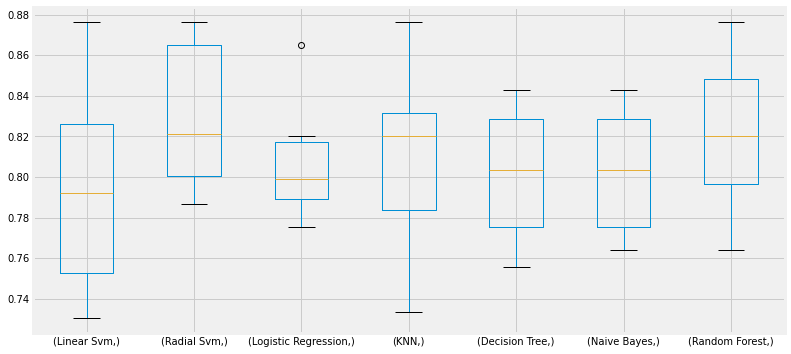

In [139]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

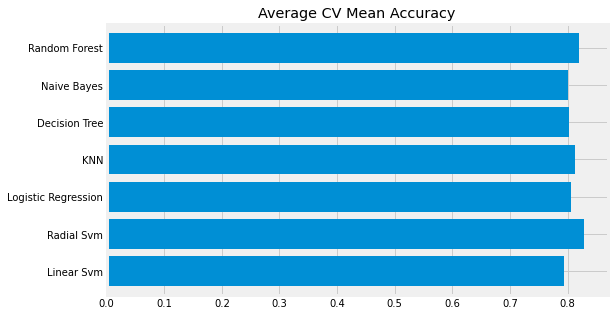

In [140]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

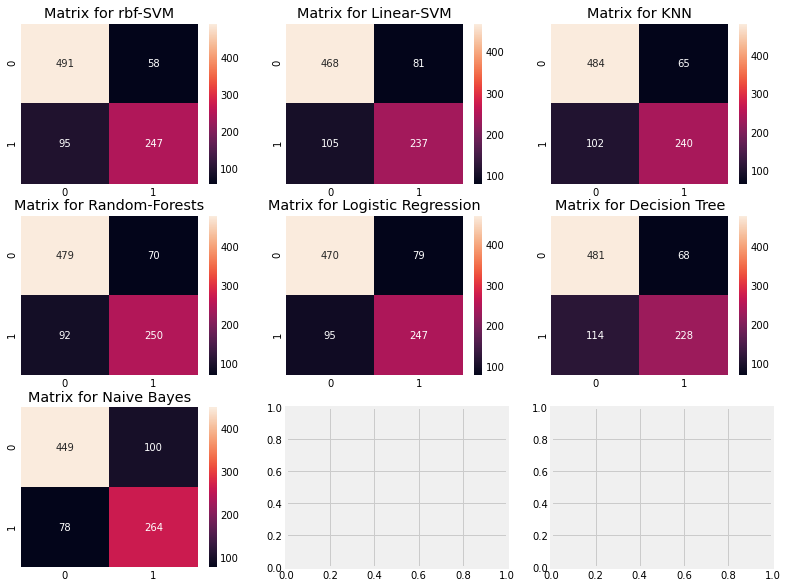

In [141]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

왼쪽 위가 사망자 수를 정확히 예측한 수이고, 오른쪽 아래가 생존자 수를 정확히 예측한 수이다.   
rbf-SVM의 경우 491(사망자의 경우) + 247(생존자의 경우)이고 평균 CV 정확도는 (491+247)/891 = 82.8% 이 된다.

# Ensembling

모델의 정확도 또는 성능을 높이는 좋은 방법으로,   
다양한 단순 모델의 조합으로 하나의 강력한 모델을 만드는 것이다.

### Voting Classifier

많은 다른 간단한 기계 학습 모델의 예측을 결합하는 가장 간단한 방법이다. 모든 하위 모델의 예측에 기반한 평균 예측 결과를 제공한다.

In [142]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


# subsession

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
train_and_test = [train,test]

In [15]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [17]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer','Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [19]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

In [20]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

In [21]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

In [25]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'], 5)
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()) # Survivied ratio about Age Band

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [26]:
for dataset in train_and_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [27]:
print (train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


In [28]:
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.675) # The only one empty fare data's pclass is 3.

In [29]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

In [30]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

In [37]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand'], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


In [38]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [43]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [44]:
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  82.72 %
Accuracy :  83.5 %
Accuracy :  85.63 %
Accuracy :  88.55 %
Accuracy :  79.8 %


In [45]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})

submission.to_csv('submission_rf.csv', index=False)